## 6번. 고양이와개는 몇 마리 있을까

동물 보호소에 들어온 동물 중 고양이와 개가 각각 몇 마리인지 조회하는 SQL문을 작성해주세요. 이때 고양이를 개보다 먼저 조회해주세요.

고양이는 2마리, 개는 1마리 들어왔습니다. 따라서 SQL문을 실행하면 다음과 같이 나와야 합니다.

    ANIMAL_TYPE	count
    Cat	2
    Dog	1

In [ ]:
create table animal_ins3 as select * from animal_ins where 1=2;

insert into animal_ins3 values('A373219', 'Cat', '2014-07-29 11:43:00', 'Normal', 'Ella', 'Spayed Female');
insert into animal_ins3 values('A377750', 'Dog', '2017-10-25 17:17:00', 'Normal', 'Lucy', 'Spayed Female');
insert into animal_ins3 values('A354540', 'Cat', '2014-12-11 11:48:00', 'Normal', 'Tux', 'Neutered Male');

SELECT ANIMAL_TYPE, COUNT(ANIMAL_TYPE)
FROM ANIMAL_INS3
GROUP BY ANIMAL_TYPE
ORDER BY ANIMAL_TYPE;

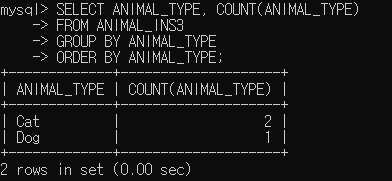

## 7번. 동명 동물 수 찾기

동물 보호소에 들어온 동물 이름 중 두 번 이상 쓰인 이름과 해당 이름이 쓰인 횟수를 조회하는 SQL문을 작성해주세요. 이때 결과는 이름이 없는 동물은 집계에서 제외하며, 결과는 이름 순으로 조회해주세요.

In [ ]:
create table animal_ins4 as select * from animal_ins where 1=2;

insert into animal_ins4 values('A396810', 'Dog', '2016-08-22 16:13:00', 'Injured', 'Raven', 'Spayed Female');
insert into animal_ins4 values('A377750', 'Dog', '2017-10-25 17:17:00', 'Normal', 'Lucy', 'Spayed Female');
insert into animal_ins4 values('A355688', 'Dog', '2014-01-26 13:48:00', 'Normal', 'Shadow', 'Neutered Male');
insert into animal_ins4 values('A399421', 'Dog', '2015-08-25 14:08:00', 'Normal', 'Lucy', 'Spayed Female');
insert into animal_ins4 values('A400680', 'Dog', '2017-06-17 13:29:00', 'Normal', 'Lucy', 'Spayed Female');
insert into animal_ins4 values('A410668', 'Cat', '2015-11-19 13:41:00', 'Normal', 'Raven', 'Spayed Female');

SELECT NAME, COUNT(NAME)
FROM ANIMAL_INS4
WHERE NAME IS NOT NULL 
GROUP BY NAME
HAVING COUNT(NAME)>1
ORDER BY NAME;

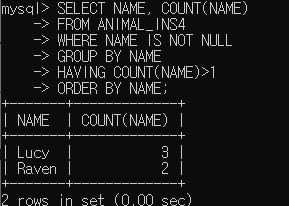

## 8번. 입양 시각 구하기(1)

In [ ]:
create table animal_ins5 as select * from animal_ins where 1=2;
alter table animal_ins5 drop intake_condition;

### 이문제는 테이블 예시가 없네요..?
- 테이블 구조 만들었는데..
- 테스트 해보지 못하고 코드짜고 바로 실행 고고

In [ ]:
SELECT HOUR(DATETIME) HOUR, COUNT(DATETIME) COUNT
FROM ANIMAL_OUTS
GROUP BY HOUR(DATETIME)
HAVING HOUR >= 9 and HOUR <= 19
ORDER BY HOUR;

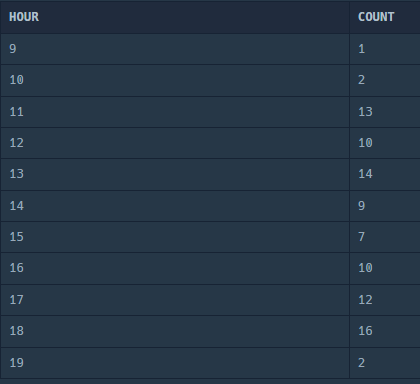

보호소에서는 몇 시에 입양이 가장 활발하게 일어나는지 알아보려 합니다. 0시부터 23시까지, 각 시간대별로 입양이 몇 건이나 발생했는지 조회하는 SQL문을 작성해주세요. 이때 결과는 시간대 순으로 정렬해야 합니다.

In [ ]:
SELECT HOUR(DATETIME) HOUR, COUNT(DATETIME) COUNT
FROM ANIMAL_OUTS
GROUP BY HOUR(DATETIME)
HAVING HOUR >= 0 and HOUR <= 23
ORDER BY HOUR;
# 7~19시 까지밖에 안나온다

### 검색으로 찾은 코드↓

In [ ]:
SET @hour := -1;

SELECT (@hour := @hour + 1) as HOUR,
(SELECT COUNT(*) FROM ANIMAL_OUTS WHERE HOUR(DATETIME) = @hour) as COUNT
FROM ANIMAL_OUTS
WHERE @hour < 23
ORDER BY HOUR;

set으로 옆에 변수명과 초기값을 설정할 수 있다고 하고

@hour 초기값을 -1 로 설정( :=은 비교연산자 , = 과 혼동 피하기 위한 대입연산)
SELECT (@hour := @hour +1) 은 @hour의 값에 1씩 증가시키면서 SELECT 문 전체를 실행하게 됩니다.

이 때 처음에 @hour 값이 -1 인데, 이 식에 의해 +1 이 되어 0이 저장됩니다
- HOUR 값이 0부터 시작할 수 있습니다.
- WHERE @hour < 23일 때까지, @hour 값이 계속 + 1씩 증가합니다.